# Simple Linear Regression

$\hat{y_i} = ax_i + b$

### Sum of Squared Errors

$
Error = \sum\limits_{i=1}^N {(y_i - \hat{y_i})}^2
$

Substitude with our model for a line

$
E = \sum\limits_{i=1}^N {(y_i - (ax_i + b))}^2
$

We want to minimize the error with respect to a and b. <br>
E is a function of 2 variables, therefore, we need to use partial derivatives.

### Derivative of E with respect to a

$
\frac{\partial E}{\partial a} = -2\sum\limits_{i=1}^N {(y_i-(ax_i+b))x_i}
$

 $
 -2\sum\limits_{i=1}^N ({y_i-(ax_i+b))x_i}) = 0
 $

$
a\sum\limits_{i=1}^N {x_i^2} + b\sum\limits_{i=1}^N {x_i} = \sum\limits_{i=1}^N {y_ix_i}
$

We have two unknowns, a and b, but only 1 equation. <br>
We still need to take the partial derivatie of E with respect to b.

### Derivative of E with respect to b

$
\frac{\partial E}{\partial b} = -2\sum\limits_{i=1}^N {(y_i-(ax_i+b))}
$

$
-2\sum\limits_{i=1}^N {(y_i-(ax_i+b))} = 0
$

$
a\sum\limits_{i=1}^N {x_i} + bN = \sum\limits_{i=1}^N{y_i}
$

We have 2 equations and 2 unknowns, a and b.

$
a\sum\limits_{i=1}^N {x_i^2} + b\sum\limits_{i=1}^N {x_i} = \sum\limits_{i=1}^N {y_ix_i} \\
a\sum\limits_{i=1}^N {x_i} + bN = \sum\limits_{i=1}^N{y_i}
$

$
A = \sum\limits_{i=1}^N{x_i^2},  B=\sum\limits_{i=1}^N {x_i}, C=\sum\limits_{i=1}^N {y_ix_i}, D = \sum\limits_{i=1}^N{y_i}
$

$
Aa + Bb = C \\
Ba + bN = D
$

Solve for a and b.

$
a = \frac{CN-BD}{AN-B^2} = \frac{N\sum\limits_{i=1}^N {y_ix_i} - \sum\limits_{i=1}^N {x_i}\sum\limits_{i=1}^N{y_i}}{N\sum\limits_{i=1}^N{x_i^2}-(\sum\limits_{i=1}^N {x_i})^2} \\
b = \frac{BC-AD}{B^2-AN} = \frac{\sum\limits_{i=1}^N {x_i}\sum\limits_{i=1}^N {y_ix_i} - \sum\limits_{i=1}^N{x_i^2}\sum\limits_{i=1}^N{y_i}}{(\sum\limits_{i=1}^N {x_i})^2-N\sum\limits_{i=1}^N{x_i^2}}
$

$
\bar{x} = \frac{1}{N}\sum\limits_{i=1}^N{x_i} \\
\bar{xy} = \frac{1}{N}\sum\limits_{i=1}^N{x_iy_i}
$

$
a = \frac{\bar{xy}-\bar{x}\bar{y}}{\bar{x^2}-\bar{x}^2} = \frac{\sum\limits_{i=1}^N{y_ix_i}-\bar{y}\sum\limits_{i=1}^N{x_i}}{\sum\limits_{i=1}^N{x_i^2}-\bar{x}\sum\limits_{i=1}^N{x_i}} \\
b = \frac{\bar{y}\bar{x^2}-\bar{x}\bar{xy}}{\bar{x^2}-\bar{x}^2} = \frac{\bar{y}\sum\limits_{i=1}{x_i^2}-\bar{x}\sum\limits_{i=1}{y_ix_i}}{\sum\limits_{i=1}{x_i^2}-\bar{x}\sum\limits_{i=1}^N{x_i}}
$

# Let's code!

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = []
Y = []
for line in open('data_1d.csv'):
    x, y = line.split(',')
    X.append(float(x))
    Y.append(float(y))

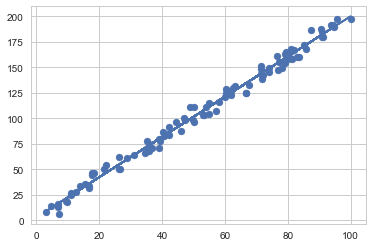

In [6]:
X = np.array(X)
Y = np.array(Y)


deno = X.dot(X) - X.mean()*X.sum()
a = (Y.dot(X) - Y.mean()*X.sum()) / deno
b = (Y.mean()*X.dot(X) - X.mean()*Y.dot(X)) / deno
Y_hat = a*X + b
plt.scatter(X, Y)
plt.plot(X, Y_hat)
plt.show()



How good is the model? $R^2$

$
R^2 \equiv 1 - \frac{SS_{res}}{SS_{tot}} \\
SS_{res} \equiv \sum\limits_{i=1}^N({y_i - \hat{y_i})^2} \\
SS_{tot} \equiv \sum\limits_{i=1}^N({y_i - \bar{y_i})^2}
$

# Let's calculate $R^2$

In [4]:
ss_res = (Y-Y_hat).dot(Y-Y_hat)
ss_tot = (Y-Y.mean()).dot(Y-Y.mean())
r2 = 1 - (ss_res/ss_tot)
r2

0.99071378767131202